In [1]:
import os
import warnings
#data handling
import numpy as np # linear algebra
import pandas as pd # data processing
#vasuliization handling
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning library
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease/heart.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
#show missing value in data
print(f"Missing Value = {df.isnull().sum()}")

#show duplicated value
print(f'Duplicated = {df.duplicated().sum()}')

#the shape of data
print (f'Shape = {df.shape}')

Missing Value = age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Duplicated = 1
Shape = (303, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Rename columns

In [6]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [7]:
#check after rename
df.sample()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1


## Data pre-processing

In [8]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

In [9]:
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

In [10]:
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 0] = 'normal'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

In [11]:
df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

In [12]:
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  target                     303 non-null    int64  

In [14]:
df.sample()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
14,58,female,asymptomatic,150,283,greater than 120mg/ml,normal,162,no,1.0,downsloping,0,normal,1


In [15]:
df.head(20)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,flat,0,fixed defect,1
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,flat,0,normal,1
7,44,male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,downsloping,0,reversable defect,1
8,52,male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,downsloping,0,reversable defect,1
9,57,male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,downsloping,0,normal,1


In [16]:
df.describe(include='all')


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303,303,303.000000,303.000000,303,303,303.000000,303,303.000000,303,303.000000,303,303.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,4,NaN
top,NaN,male,typical angina,NaN,NaN,lower than 120mg/ml,ST-T wave abnormality,NaN,no,NaN,downsloping,NaN,normal,NaN
freq,NaN,207,143,NaN,NaN,258,152,NaN,204,NaN,142,NaN,166,NaN
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,0.729373,NaN,0.544554
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,1.022606,NaN,0.498835
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,0.000000,NaN,1.000000
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,1.000000,NaN,1.000000


## Data visulaization

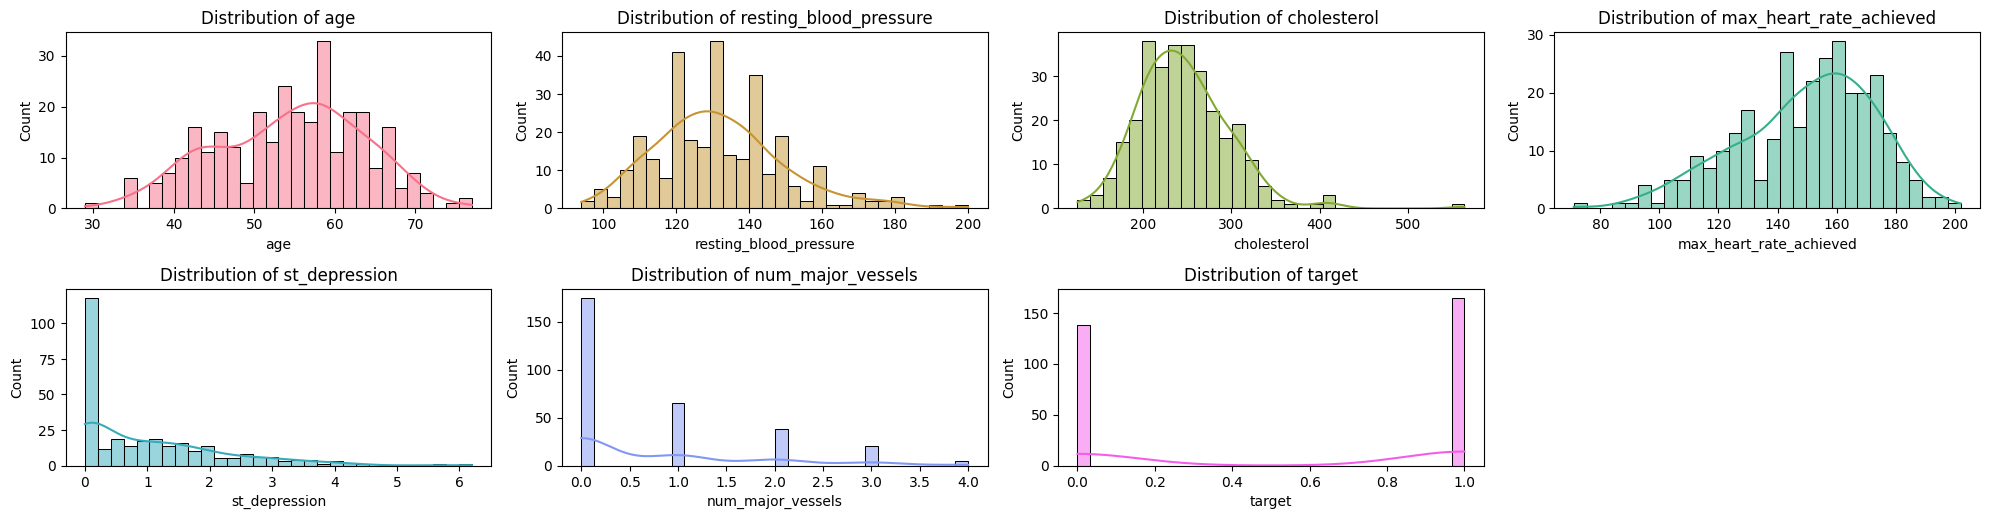

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define color palette
palette = sns.color_palette("husl", len(numerical_cols))

#to show Distribution
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

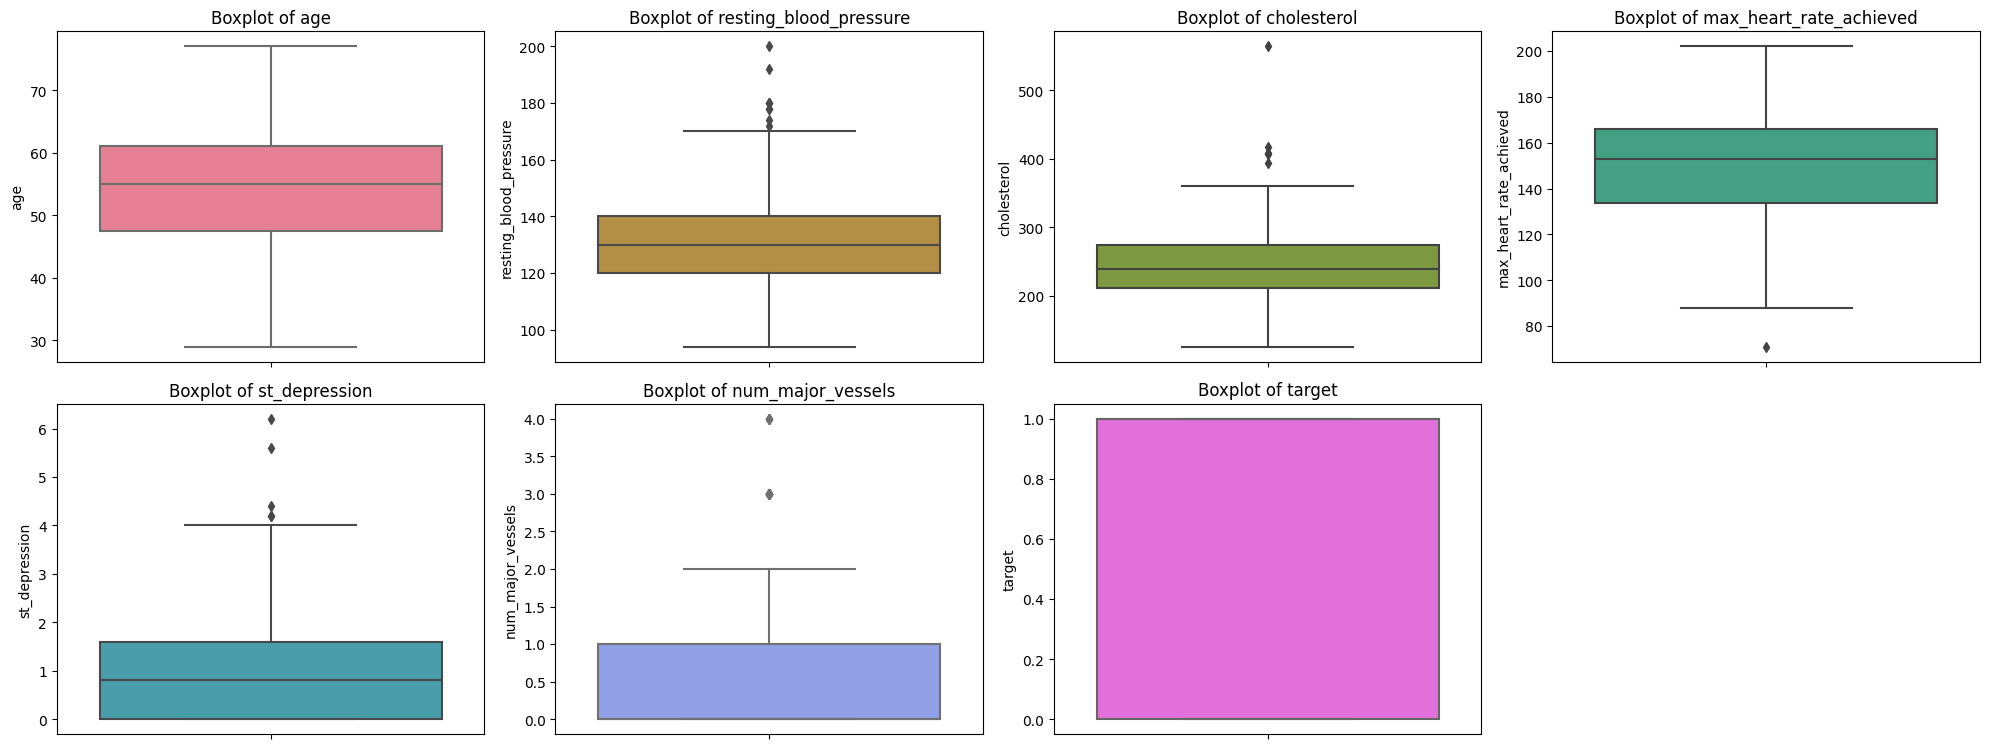

In [18]:
# Define color palette
palette = sns.color_palette("husl", len(numerical_cols))

#to show Outliers in data 
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [19]:
categorical_cols = [
    'sex', 'chest_pain_type', 'fasting_blood_sugar',
    'resting_electrocardiogram', 'exercise_induced_angina',
    'st_slope', 'thalassemia'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

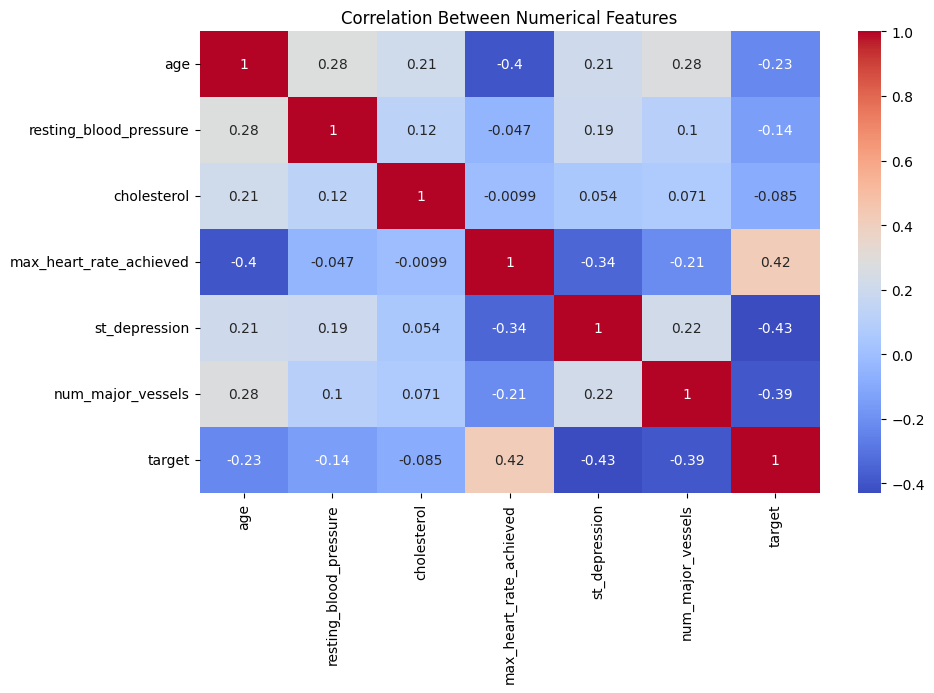

In [20]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Between Numerical Features")
plt.show()


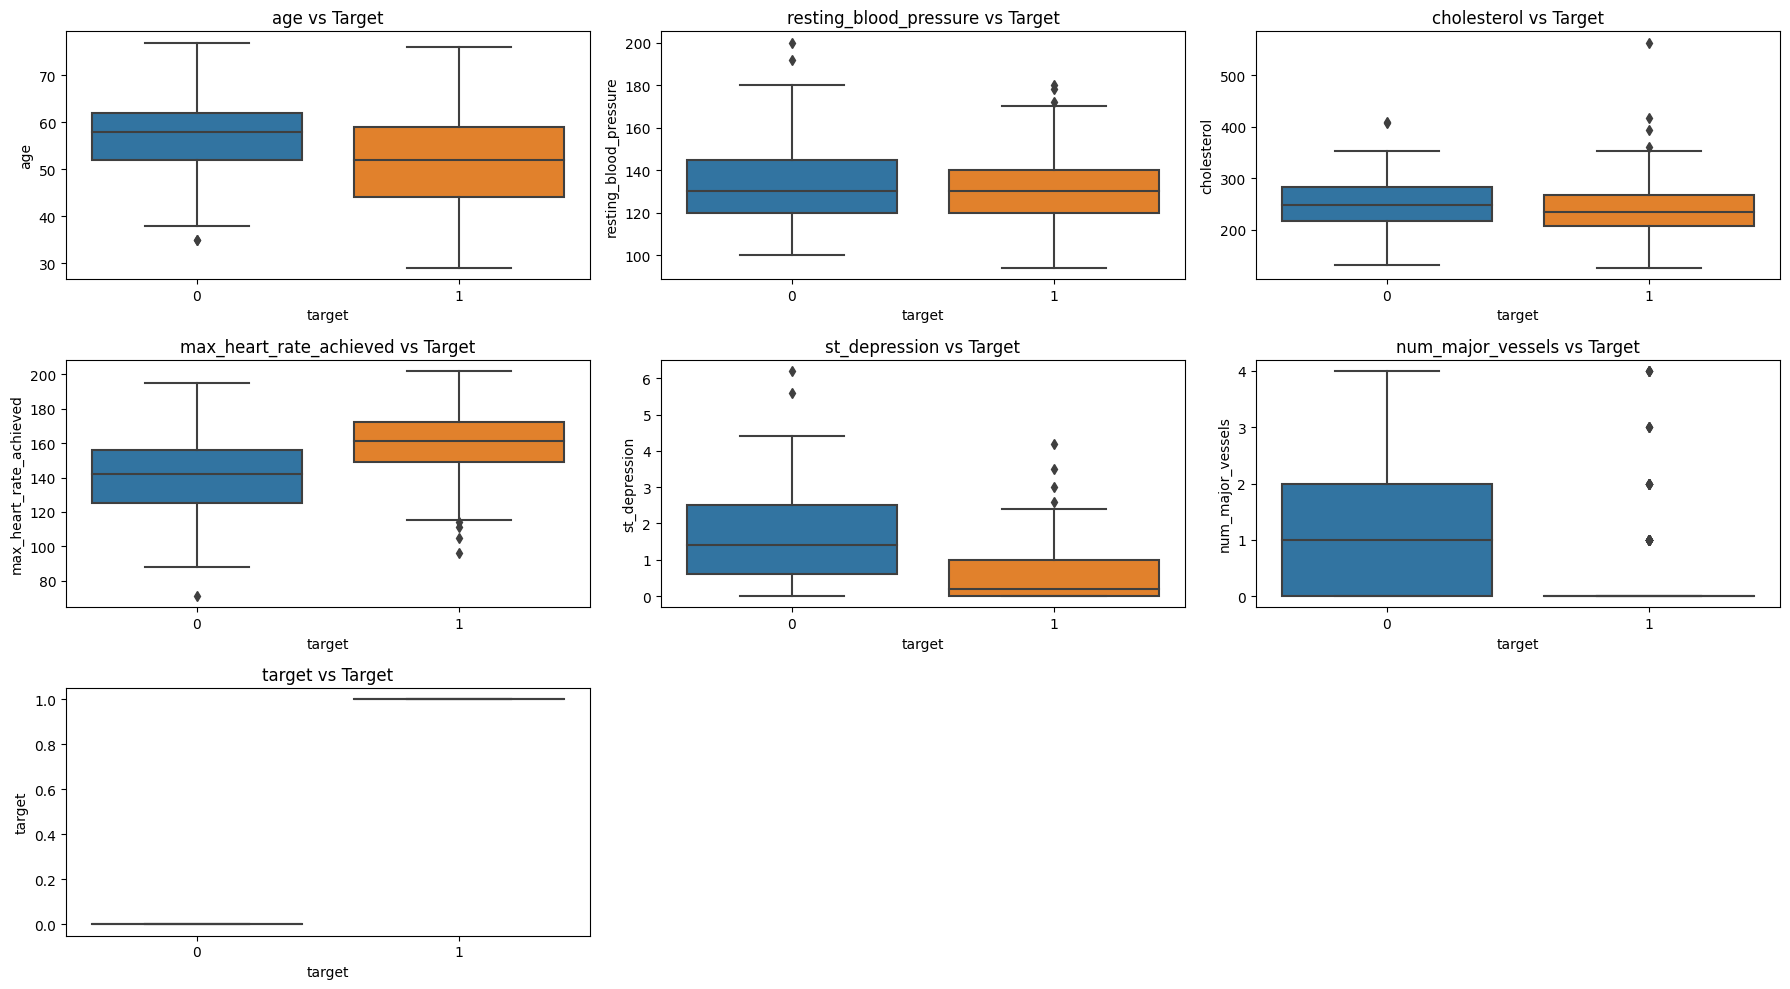

In [21]:
plt.figure(figsize=(18,10))
for i, col in enumerate(numeric_df):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f"{col} vs Target")

plt.tight_layout()
plt.show()


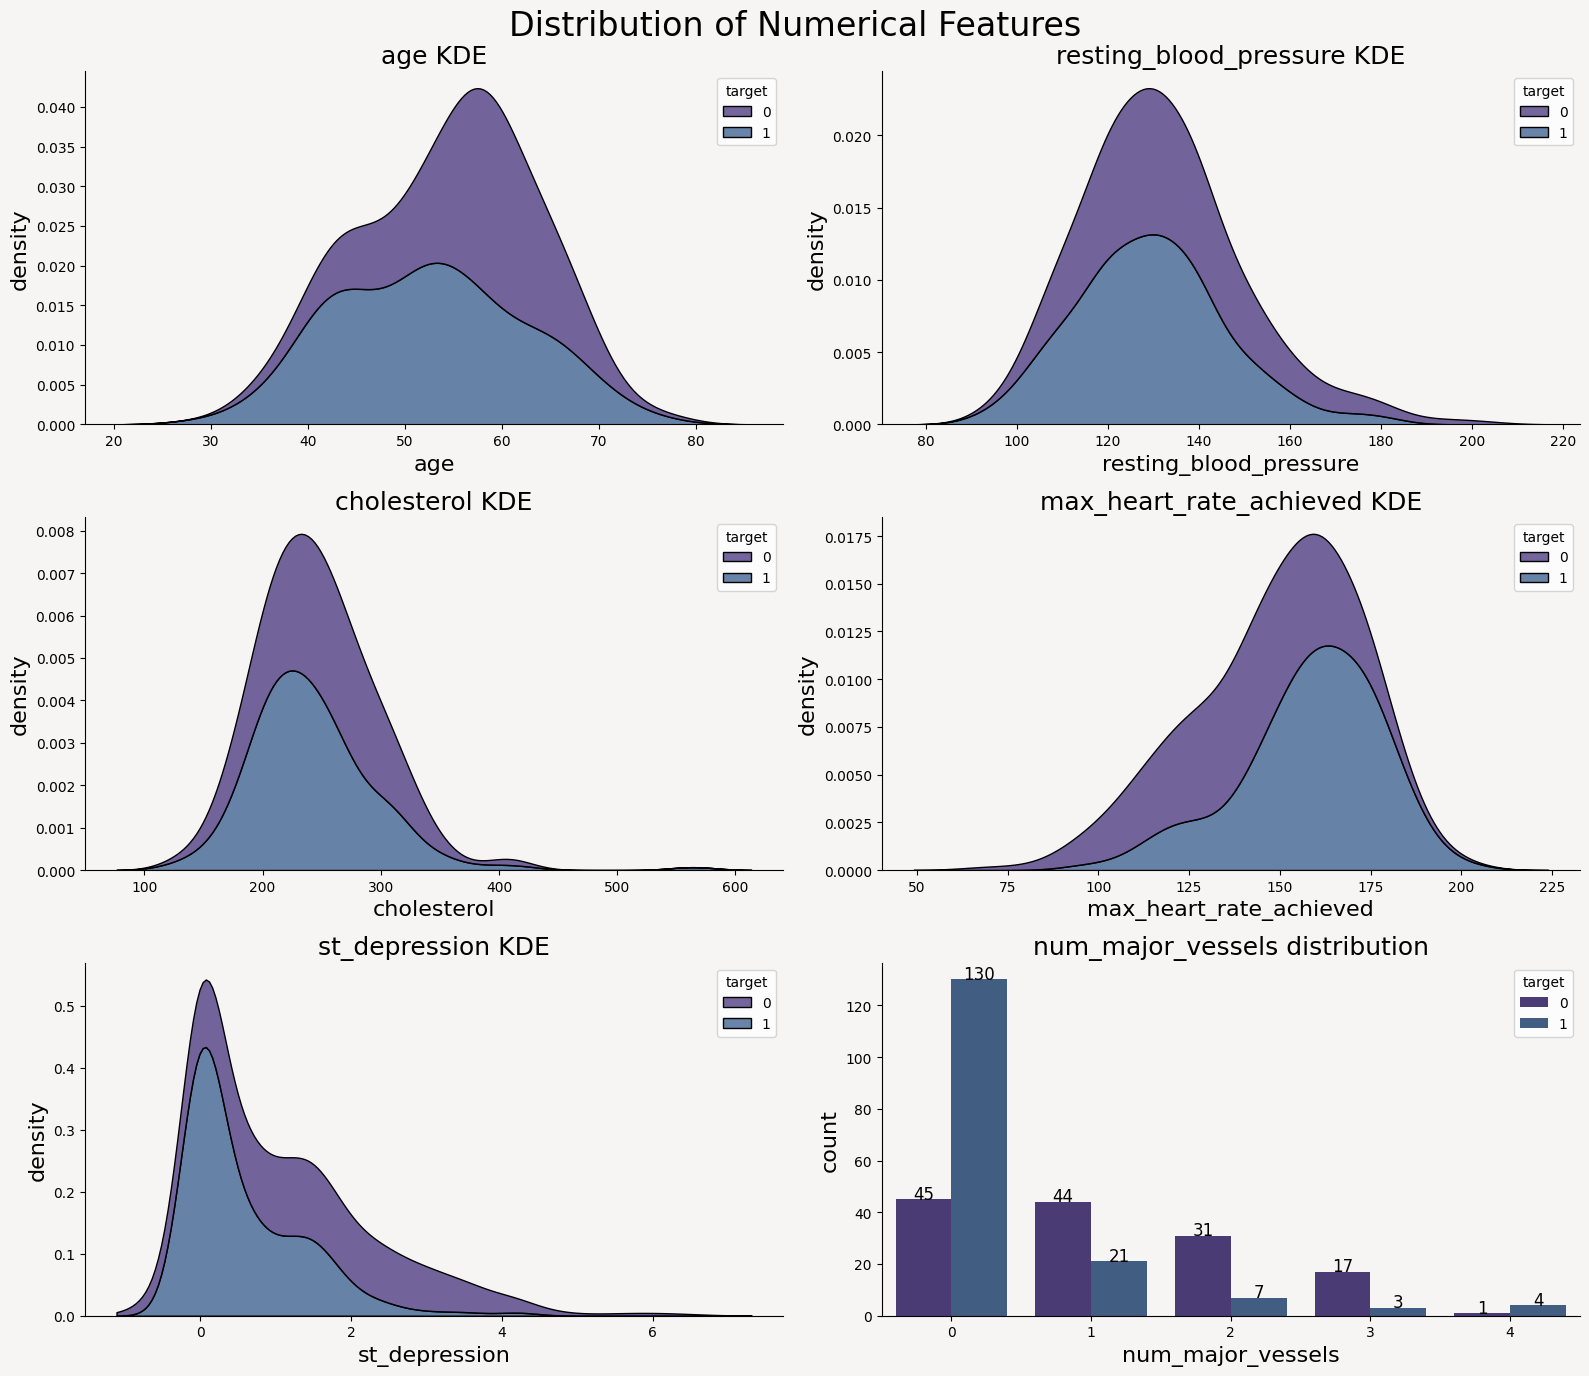

In [22]:
num_feats = ['age','resting_blood_pressure','cholesterol',
             'max_heart_rate_achieved','st_depression','num_major_vessels']

mypal = sns.color_palette("viridis")  

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)
axes = axes.flatten()

for i, col in enumerate(num_feats):
    
    ax = axes[i]
    ax.set_facecolor('#F6F5F4')

    # Special case for discrete variable
    if col == 'num_major_vessels':
        sns.countplot(data=df, x=col, hue="target", palette=mypal, ax=ax)
        ax.set_xlabel(col, fontsize=16)
        ax.set_ylabel("count", fontsize=16)
        ax.set_title(f"{col} distribution", fontsize=18)

        # Add count labels
        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width()/2,
                height + 0.2,
                f'{int(height)}',
                ha="center",
                fontsize=12
            )

    else:
        sns.kdeplot(
            data=df,
            x=col,
            hue="target",
            multiple="stack",
            palette=mypal,
            ax=ax
        )
        ax.set_xlabel(col, fontsize=16)
        ax.set_ylabel("density", fontsize=16)
        ax.set_title(f"{col} KDE", fontsize=18)

    sns.despine(ax=ax)

plt.suptitle("Distribution of Numerical Features", fontsize=24)
plt.tight_layout()
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        303 non-null    int64   
 1   sex                        303 non-null    category
 2   chest_pain_type            303 non-null    category
 3   resting_blood_pressure     303 non-null    int64   
 4   cholesterol                303 non-null    int64   
 5   fasting_blood_sugar        303 non-null    category
 6   resting_electrocardiogram  303 non-null    category
 7   max_heart_rate_achieved    303 non-null    int64   
 8   exercise_induced_angina    303 non-null    category
 9   st_depression              303 non-null    float64 
 10  st_slope                   303 non-null    category
 11  num_major_vessels          303 non-null    int64   
 12  thalassemia                303 non-null    category
 13  target                     303 non-

## Encoding categorical columns 

In [24]:
categorical_cols = [
    'sex','chest_pain_type','fasting_blood_sugar',
    'resting_electrocardiogram','exercise_induced_angina',
    'st_slope','thalassemia'
]

for col in categorical_cols:
    df[col] = df[col].astype(str)


In [25]:
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    int64  
 2   chest_pain_type            303 non-null    int64  
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    int64  
 6   resting_electrocardiogram  303 non-null    int64  
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    int64  
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    int64  
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    int64  
 13  target                     303 non-null    int64  

## Split target

In [27]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,stratify=y
, random_state=42)


In [28]:
X

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,0,145,233,0,2,150,0,2.3,2,0,1
1,37,1,2,130,250,1,0,187,0,3.5,2,0,2
2,41,0,1,130,204,1,2,172,0,1.4,0,0,2
3,56,1,1,120,236,1,0,178,0,0.8,0,0,2
4,57,0,3,120,354,1,0,163,1,0.6,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,3,140,241,1,0,123,1,0.2,1,0,3
299,45,1,0,110,264,1,0,132,0,1.2,1,0,3
300,68,1,3,144,193,0,0,141,0,3.4,1,2,3
301,57,1,3,130,131,1,0,115,1,1.2,1,1,3


## Random Forest model

In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8032786885245902

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



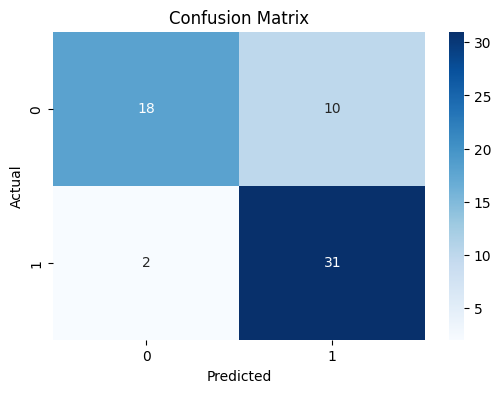

In [31]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

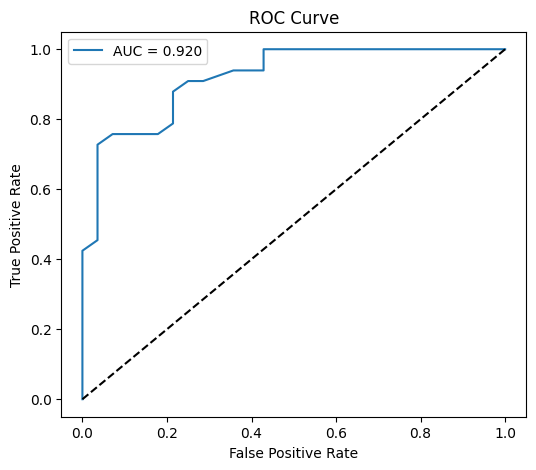

AUC Score: 0.9199134199134199


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_val)[:,1]   

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", auc)

In [33]:
model2 = RandomForestClassifier(
    random_state=42,
    n_estimators=500,
    max_depth=14,
    min_samples_split=2,
    min_samples_leaf=1
)

model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=500, random_state=42)

In [34]:
y_pred = model2.predict(X_val)

print(" Accuracy:", accuracy_score(y_val, y_pred))
print("\n Classification Report:\n", classification_report(y_val, y_pred))


 Accuracy: 0.8032786885245902

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



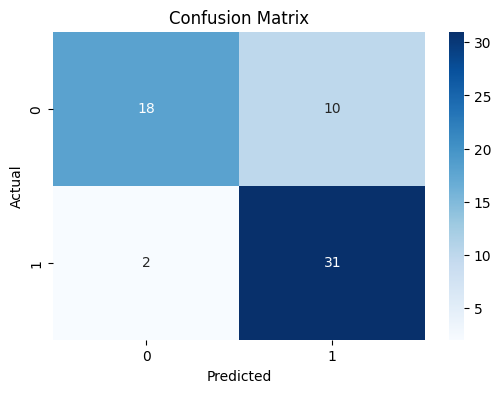

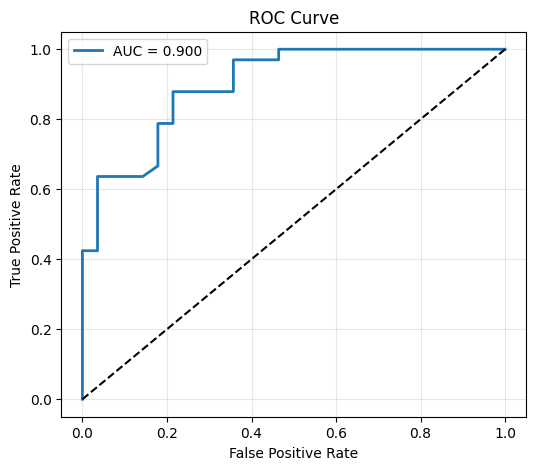

 AUC Score: 0.899891774891775


In [35]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# probability of class = 1
y_prob = model2.predict_proba(X_val)[:,1]

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(" AUC Score:", auc)

In [36]:
import joblib

# save model
joblib.dump(model, "random_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!
